In [56]:
import pandas as pd 

df = pd.read_csv('kc_house_data_small.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
2609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
2610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
2611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [57]:
df['unit_price'] = df['price'] / df['sqft_living']

In [58]:
df2 = pd.DataFrame()
df2['unit_price'] = df.groupby('zipcode')['sqft_living'].mean()
df2


,zipcode,unit_price
0,98178,NaN
1,98058,NaN
2,98112,NaN
3,98055,NaN
4,98144,NaN
...,...,...
65,98168,NaN
66,98014,NaN
67,98039,NaN
68,98070,NaN


<BarContainer object of 10 artists>

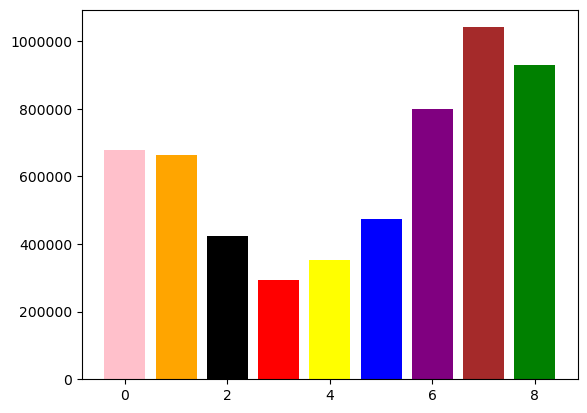

In [59]:
#Create a dataframe with two columns: bedrooms and mean price. Each unique
#count of bedrooms will have its own row, and the second column will be the 
#mean price for properties with that many bedrooms. Use a bar plot to display
#your dataframe. Give each bar its own colour.

import matplotlib.pyplot as plt
import math as math 
c = ['red', 'yellow', 'black', 'blue', 'orange', 'purple', 'green', 'brown', 'pink']

df3 = pd.DataFrame()
df3['bedrooms'] = df.bedrooms.unique()
df3['price'] = df.groupby('bedrooms')['price'].mean()
plt.bar (df3.bedrooms, df3.price, color = c)


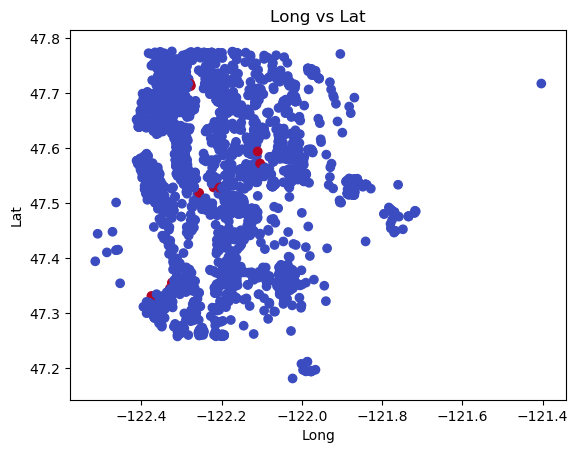

In [60]:
plt.scatter(df.long, df.lat, c = df.waterfront, cmap = 'coolwarm')
plt.title('Long vs Lat')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.show()



Text(0.5, 1.0, 'Rolling average of price')

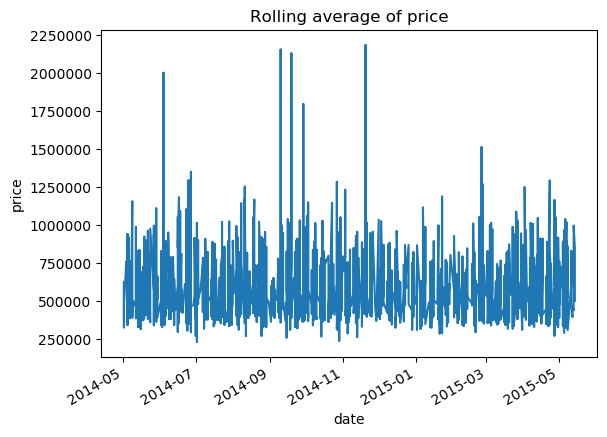

In [61]:
# Create a time-series from your dataframe. Compute the rolling average of the
# “price” feature (n = 5). Plot the rolling average time-series. Be sure you only
# plot valid data. Label and title the graph appropriately.

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df['price'].rolling(5).mean().dropna()
plot = df.plot()
plot.set_xlabel("date")
plot.set_ylabel("price")
plot.set_title("Rolling average of price")
